# Tutorial on Reproducing an Article

This notebook reproduces the figures contained in the article [D. Herb, M. Rossini, J. Ankerhold, PRE 109, 064413 (2024)](https://doi.org/10.1103/PhysRevE.109.064413).

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dehe1011/QuantumDNA-notebooks/blob/main/tutorials/PRE2024.ipynb)

In [1]:
# Flags 
save = False          # Set to True to enable saving results (currently unused in this script)
verbose = True        # Set to True to enable detailed logging

## Setup 

In [2]:
import importlib.util

# Check if the 'qDNA' package is already installed
qDNA_installed = importlib.util.find_spec('qDNA') is not None

if qDNA_installed:
    if verbose:
        print("Package 'qDNA' is already installed.")
        # Optional: Uncomment the next line to display qDNA package information
        # %pip show qDNA
else:
    # Install 'qDNA' package if not installed
    %pip install qDNA
    if verbose:
        print("Successfully installed the 'qDNA' package.")

Package 'qDNA' is already installed.


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

from qDNA import ROOT_DIR

# Define directories for data and figures
DATA_DIR = os.path.join(ROOT_DIR, "qDNA", "data", "data_paper")
FIG_DIR = os.path.join(ROOT_DIR, "qDNA", "data", "figures_tutorials")
    
SAVE_DIR = os.path.join(os.getcwd(), "my_figures")
if save:
    os.makedirs(os.path.join(os.getcwd(), SAVE_DIR), exist_ok=True)

if verbose:
    # Print the status of the directories for debugging purposes
    print(f"Data directory: '{DATA_DIR}' is ready.")
    print(f"Figures directory: '{FIG_DIR}' is ready.")
    print(f"Save directory: '{SAVE_DIR}' is ready.")

Data directory: 'C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\QuantumDNA\qDNA\data\data_paper' is ready.
Figures directory: 'C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\QuantumDNA\qDNA\data\figures_tutorials' is ready.
Save directory: 'C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\QuantumDNA-notebooks\tutorials\my_figures' is ready.


## Main body

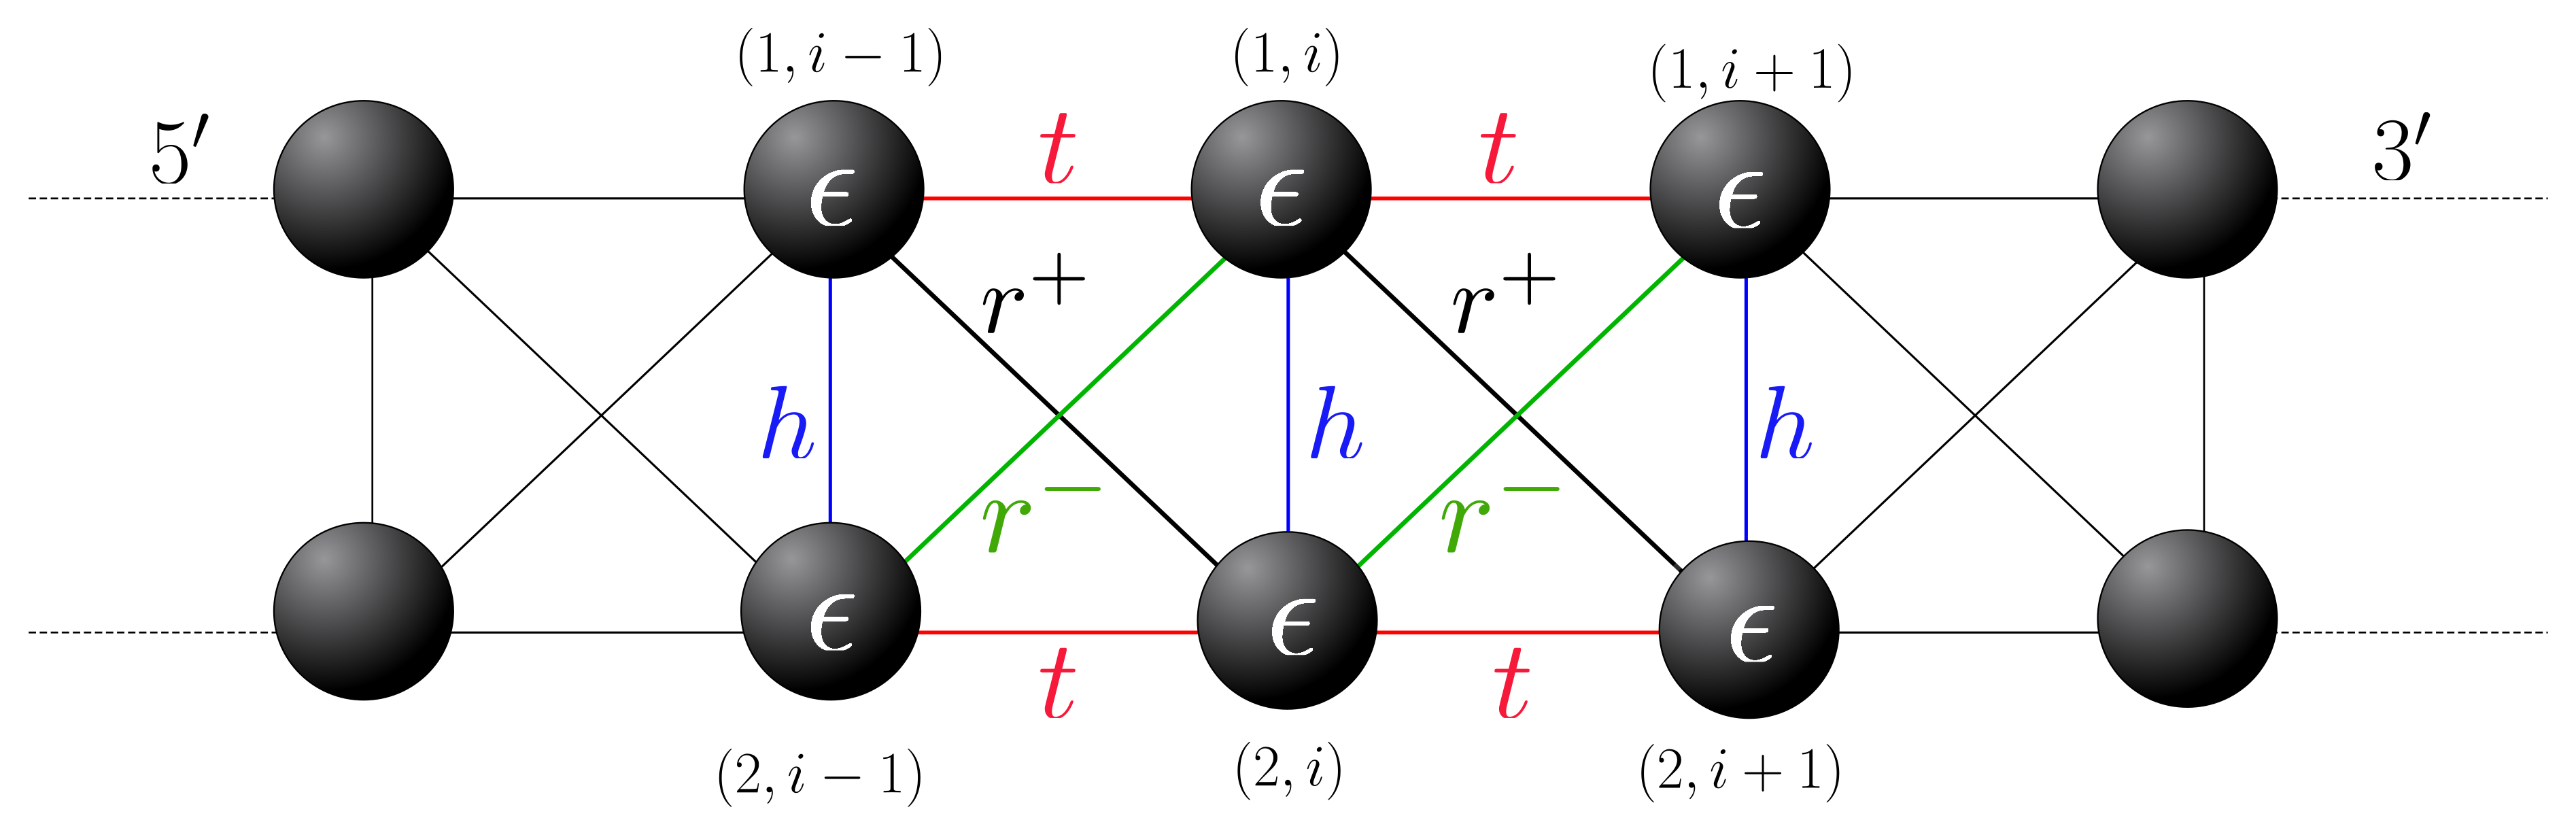

In [10]:
from IPython.display import Image
Image(filename=os.path.join(FIG_DIR,'Fig_1.png'), width=800)

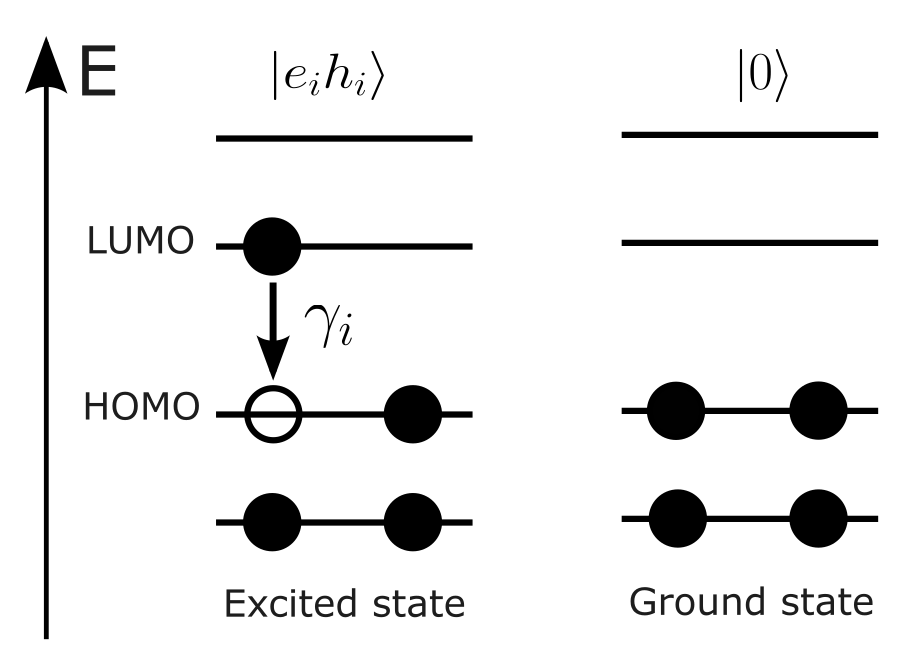

In [11]:
from IPython.display import Image
Image(filename=os.path.join(FIG_DIR,'Fig_2.png'), width=400)

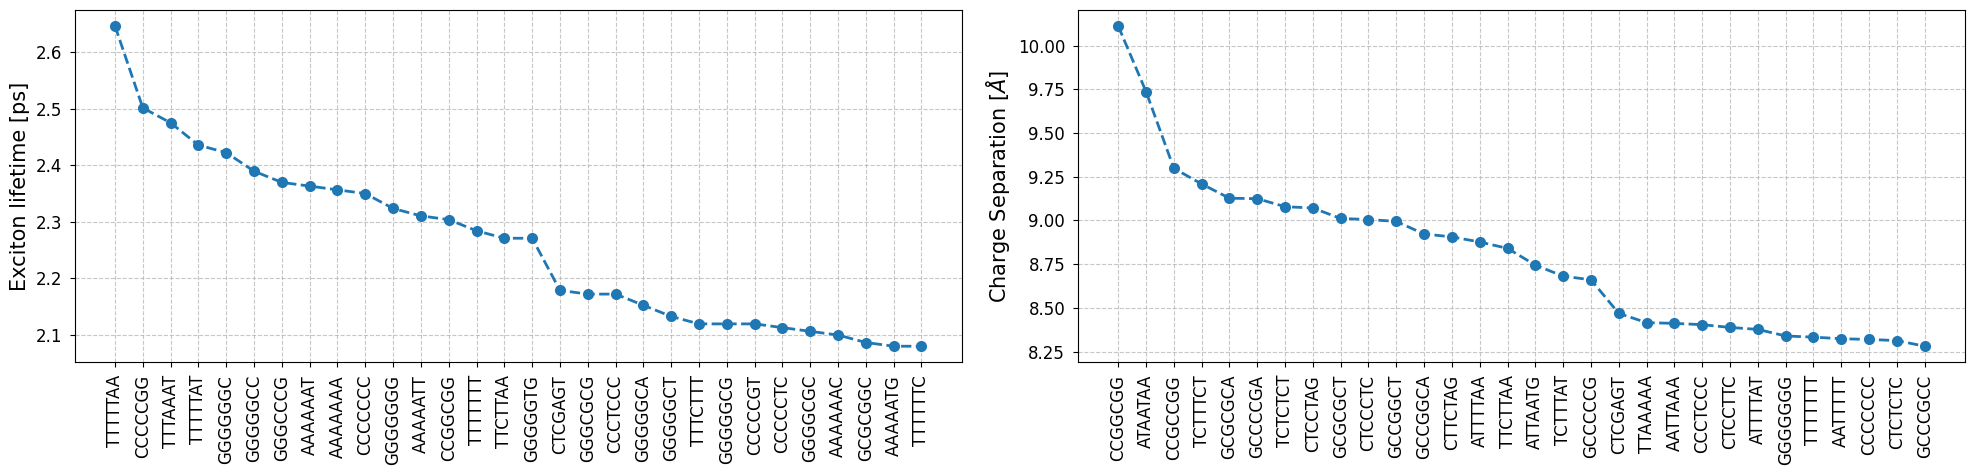

In [5]:
from qDNA import load_json, save_figure

def fig3(top_num = 30):
    
    # data preparation lifetimes
    lifetime_dict = load_json('lifetime_7bp_J0', DATA_DIR) # in fs 
    dna_seqs_lifetime = list(lifetime_dict.keys())[:top_num]
    lifetimes = np.array(list(lifetime_dict.values()))[:top_num]/1000 # in ps

    # data preparation dipoles
    dipole_dict = load_json('dipole_7bp_J0', DATA_DIR)
    dna_seqs_dipole = list(dipole_dict.keys())[:top_num]
    dipoles = list(dipole_dict.values())[:top_num]
    
    # plotting
    fig, ax = plt.subplots(1, 2, figsize= (20,5) )
    
    ax[0].plot(dna_seqs_lifetime, lifetimes, 'o--')
    ax[0].set_ylabel(r'Exciton lifetime [ps]')
    ax[0].set_xticks(dna_seqs_lifetime)
    ax[0].set_xticklabels(labels = dna_seqs_lifetime, rotation=90)
    
    ax[1].plot(dna_seqs_dipole, dipoles, 'o--')
    ax[1].set_ylabel(r'Charge Separation [$\AA$]') 
    ax[1].set_xticks(dna_seqs_dipole)
    ax[1].set_xticklabels(labels = dna_seqs_dipole, rotation=90)
    
    return fig 

fig = fig3()
if save:
    save_figure(fig, 'Fig_3', SAVE_DIR, extension='pdf')
plt.show()

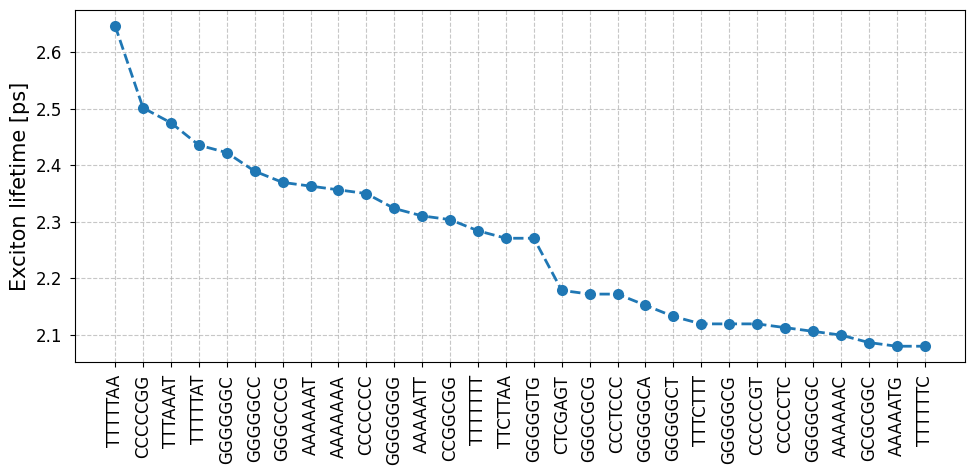

In [6]:
from qDNA import load_json, save_figure, sorted_dict

def fig3a(top_num = 30):

    # data preparation
    lifetime_dict = sorted_dict( load_json('lifetime_7bp_J0', DATA_DIR) )
    dna_seqs = list(lifetime_dict.keys())[:top_num]
    lifetimes = np.array(list(lifetime_dict.values()))[:top_num]/1000
    
    # plotting
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(dna_seqs, lifetimes, 'o--')
    ax.set_ylabel(r'Exciton lifetime [ps]')
    ax.set_xticks(dna_seqs)
    ax.set_xticklabels(labels = dna_seqs, rotation=90)

    return fig

fig = fig3a()
if save:
    save_figure(fig, 'Fig_3a', SAVE_DIR, extension='pdf')
plt.show()

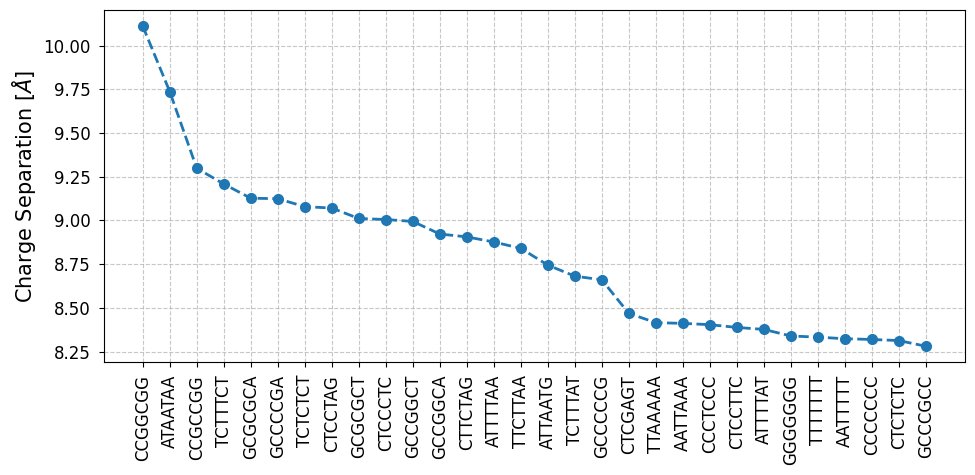

In [7]:
from qDNA import load_json, save_figure, sorted_dict

def fig3b(top_num = 30):
    
    # data preparation
    dipole_dict = sorted_dict( load_json('dipole_7bp_J0', DATA_DIR) )
    dna_seqs = list(dipole_dict.keys())[:top_num]
    dipoles = list(dipole_dict.values())[:top_num]
    
    # plotting
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(dna_seqs, dipoles, 'o--')
    ax.set_ylabel(r'Charge Separation [$\AA$]') 
    ax.set_xticks(dna_seqs)
    ax.set_xticklabels(labels = dna_seqs, rotation=90)
    
    return fig

fig = fig3b()
if save:
    save_figure(fig, 'Fig_3b', SAVE_DIR, extension='pdf')
plt.show()

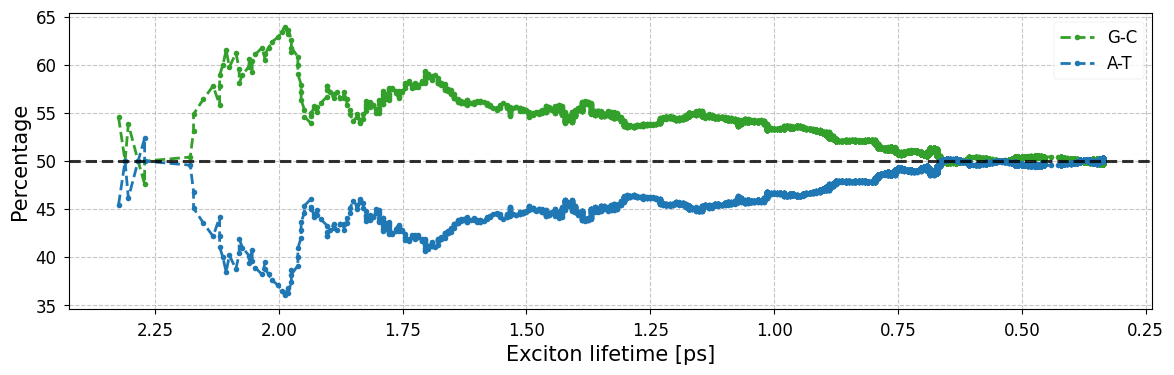

In [8]:
from qDNA import load_json, plot_dna_base_frequency, save_figure

def fig4():
    # data preparation
    # dipole_dict = load_json('dipole_7bp_J0', DATA_DIR)
    lifetime_dict = load_json('lifetime_7bp_J0', DATA_DIR)
    
    # plotting
    fig, ax = plot_dna_base_frequency(lifetime_dict)

    return fig

fig = fig4()
if save:
    save_figure(fig, 'Fig_4', SAVE_DIR, format='pdf')
plt.show()

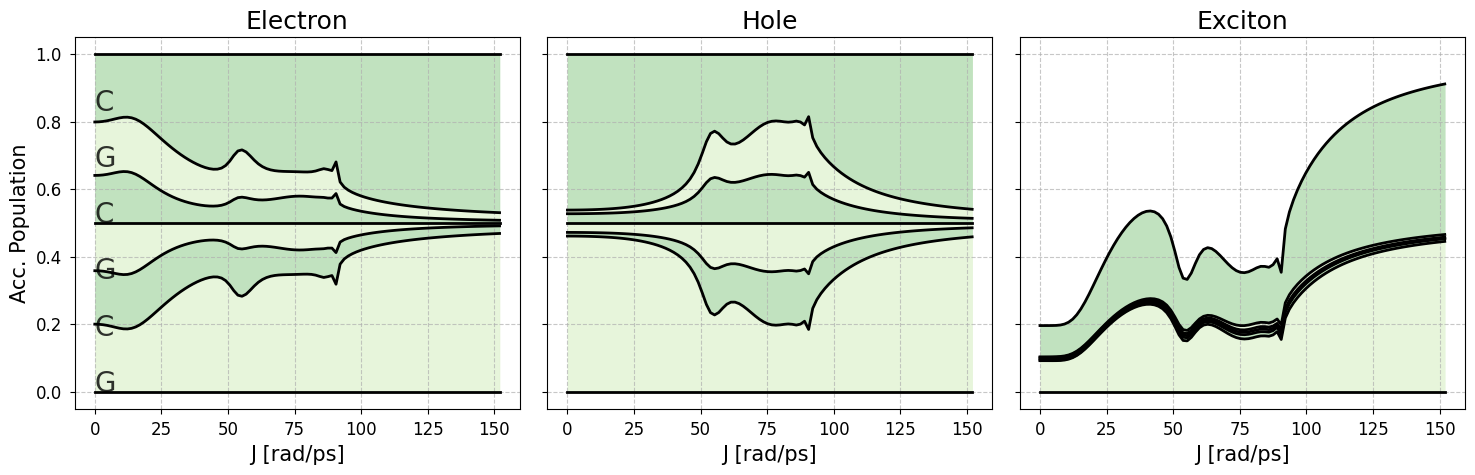

In [15]:
from qDNA import DNA_Seq, TB_Ham, plot_average_pop, save_figure

def fig5a(source = 'Simserides2014',
          upper_strand = 'GCGCGC', 
          tb_model_name = 'WM',
          J_list = np.linspace(0, 100, 100), 
          J_unit = 'meV'):

    # data preparation   
    dna_seq = DNA_Seq(upper_strand, tb_model_name)
    tb_ham = TB_Ham(dna_seq, source=source)
    
    # plotting
    fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    plot_average_pop(ax, tb_ham, J_list, J_unit)
    return fig

fig = fig5a()
if save:
    save_figure(fig, 'Fig_5a', SAVE_DIR, extension='pdf')
plt.show()

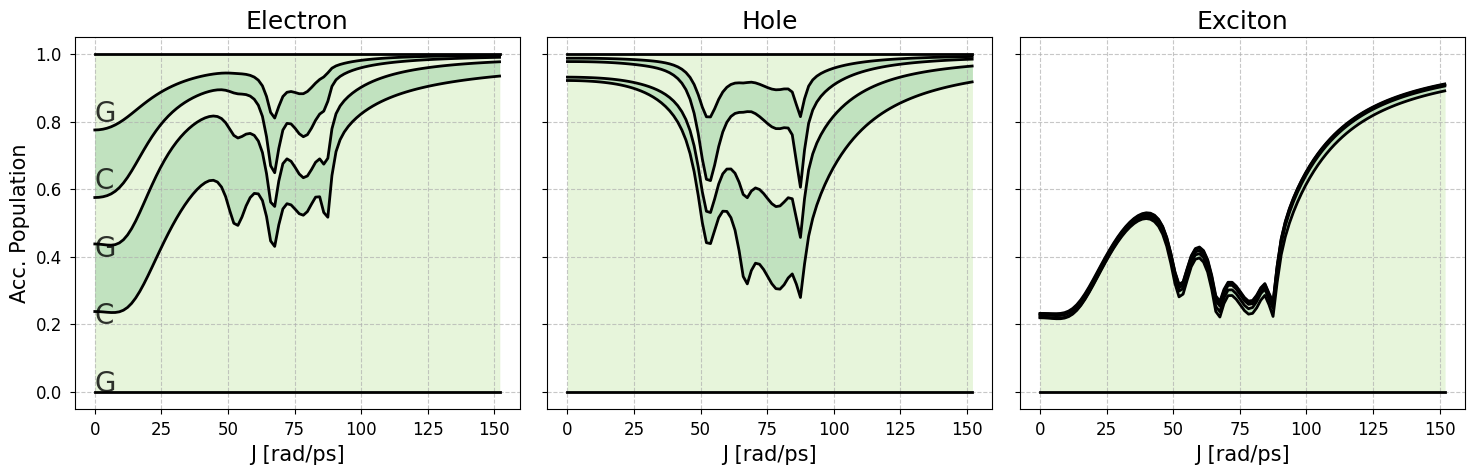

In [17]:
from qDNA import DNA_Seq, TB_Ham, plot_average_pop, save_figure

def fig5b(source = 'Simserides2014',
          upper_strand = 'GCGCG', 
          tb_model_name = 'WM',
          J_list = np.linspace(0, 100, 100), 
          J_unit = 'meV'):

    # data preparation   
    dna_seq = DNA_Seq(upper_strand, tb_model_name)
    tb_ham = TB_Ham(dna_seq, source=source)
    
    # plotting
    fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    plot_average_pop(ax, tb_ham, J_list, J_unit)
    return fig

fig = fig5b()
if save:
    save_figure(fig, 'Fig_5b', SAVE_DIR, extension='pdf')
plt.show()

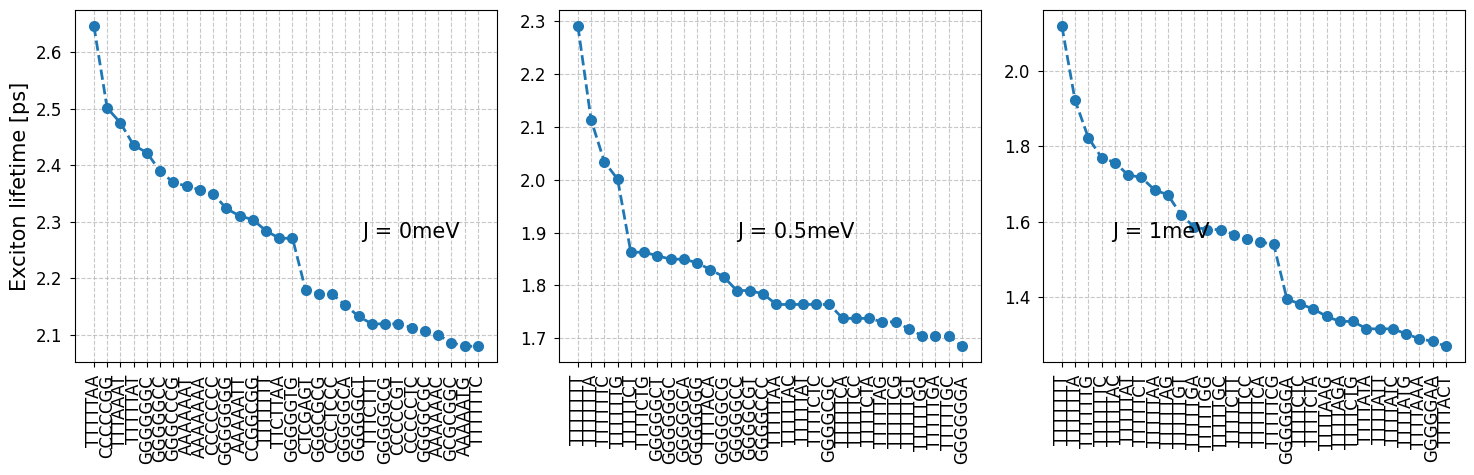

In [18]:
from qDNA import load_json, save_figure

# parameters
def fig6(top_num = 30):
    
    # plotting
    fig, ax = plt.subplots(1, 3, figsize= (15,5) )
    
    for i, J in enumerate([0,0.5,1]):
        lifetime_dict = load_json(f'lifetime_7bp_J{J}', DATA_DIR) 
        dna_seqs_lifetime = list(lifetime_dict.keys())[:top_num]
        lifetimes = np.array(list(lifetime_dict.values()))[:top_num]/1000
    
        ax[i].plot(dna_seqs_lifetime, lifetimes, 'o--')
        ax[i].set_xticks(dna_seqs_lifetime)
        ax[i].set_xticklabels(labels = dna_seqs_lifetime, rotation=90)
        fig.text(0.25*(i+1),0.5, f'J = {J}meV')
    
    ax[0].set_ylabel('Exciton lifetime [ps]')

fig = fig6()
if save:
    save_figure(fig, 'Fig_6', SAVE_DIR, extension='pdf')
plt.show()

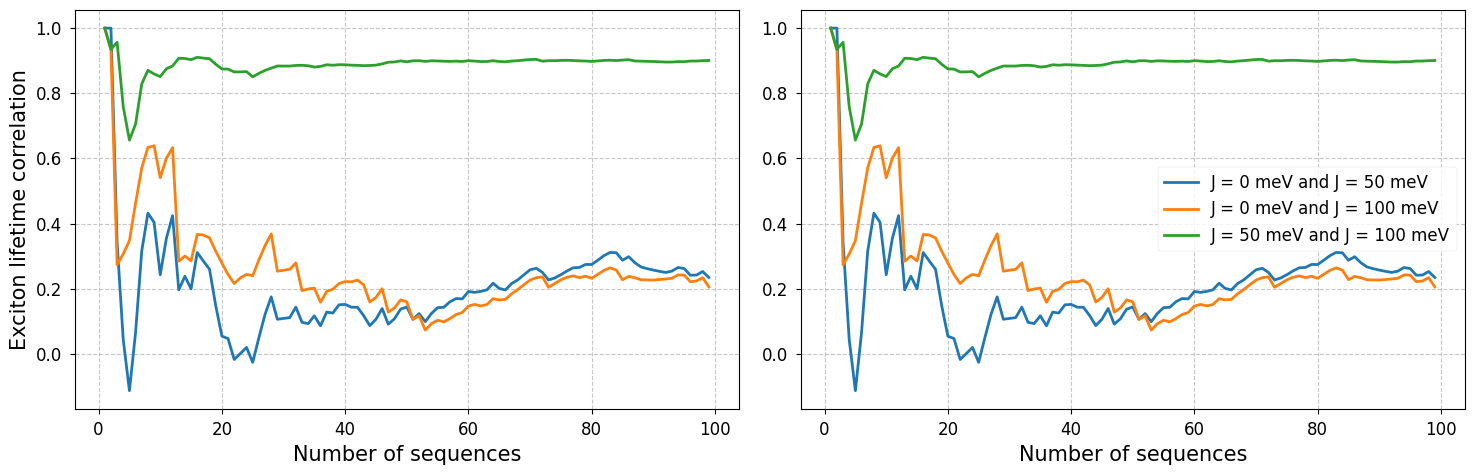

In [28]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

from qDNA import get_sorted_dict, save_figure

def fig7(num_sequences = 101):

    directory = DATA_DIR
    dominant_filename = 'lifetime_7bp_J0'
    
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    for J1, J2 in [[0,0.5],[0,1],[0.5,1]]:
        filename1, filename2 = f'lifetime_7bp_J{J1}', f'lifetime_7bp_J{J2}'
        A = get_sorted_dict(dominant_filename, filename1, directory)
        B = get_sorted_dict(dominant_filename, filename2, directory)
        corr_list=[]
        for x in range(1,num_sequences):
            corr_list.append( np.corrcoef(list(B.values())[:x],list(A.values())[:x])[0, 1] )
        ax[0].plot(corr_list[:num_sequences])
        ax[1].plot(corr_list[:num_sequences])
    
    ax[1].legend([r'J = 0 meV and J = 50 meV','J = 0 meV and J = 100 meV','J = 50 meV and J = 100 meV'])
    ax[0].set_ylabel('Exciton lifetime correlation')
    ax[0].set_xlabel('Number of sequences')
    ax[1].set_xlabel('Number of sequences')

    return fig

fig = fig7()
if save:
    save_figure(fig, 'Fig_7', SAVE_DIR, extension='pdf')
plt.show()

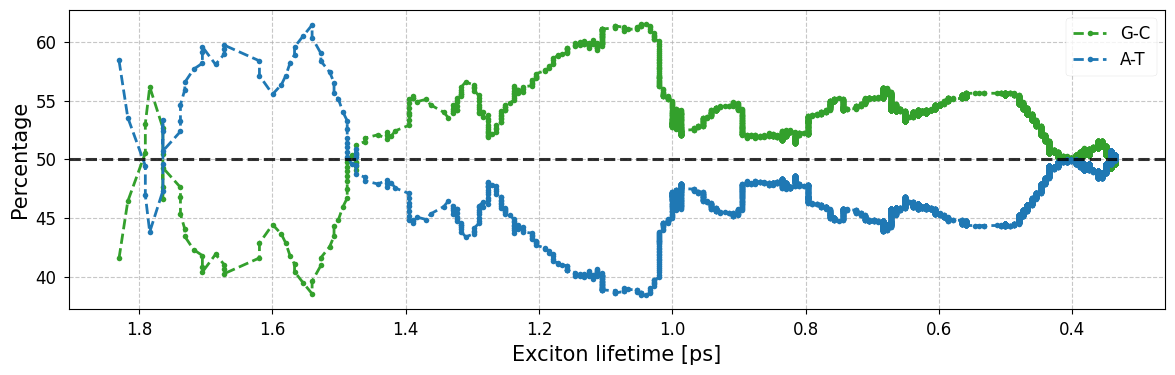

In [20]:
from qDNA import plot_dna_base_frequency, save_figure, load_json

def fig8a():
    
    # dipole_dict = load_json('dipole_7bp_J0', DATA_DIR)
    lifetime_dict = load_json('lifetime_7bp_J0.5', DATA_DIR)
    
    # plotting
    fig, ax = plot_dna_base_frequency(lifetime_dict)

    return fig

fig = fig8a()
if save:
    save_figure(fig, 'Fig_8a', SAVE_DIR, extension='pdf')
plt.show()

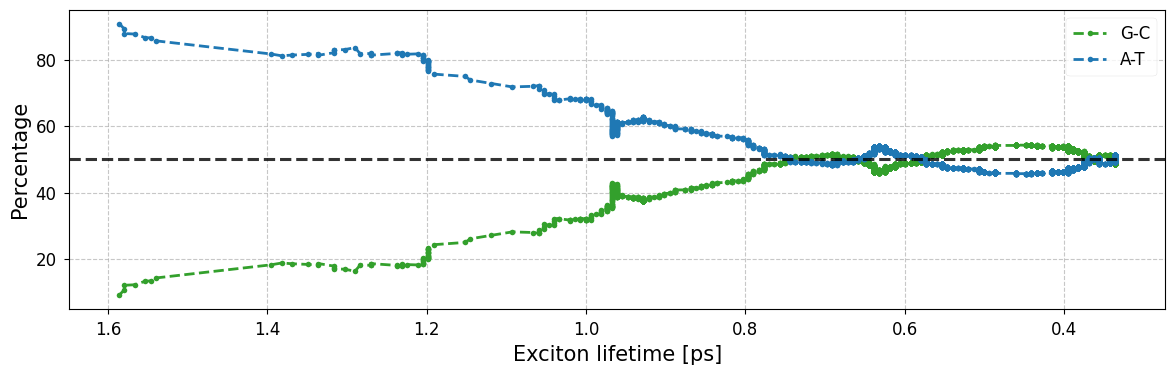

In [21]:
from qDNA import plot_dna_base_frequency, save_figure, load_json

def fig8b():
    # dipole_dict = load_json('dipole_7bp_J0', DATA_DIR)
    lifetime_dict = load_json('lifetime_7bp_J1', DATA_DIR)
    
    # plotting
    fig, ax = plot_dna_base_frequency(lifetime_dict)

    return fig

fig = fig8b()
if save:
    save_figure(fig, 'Fig_8b', SAVE_DIR, extension='pdf')
plt.show()

## Supplementary Material

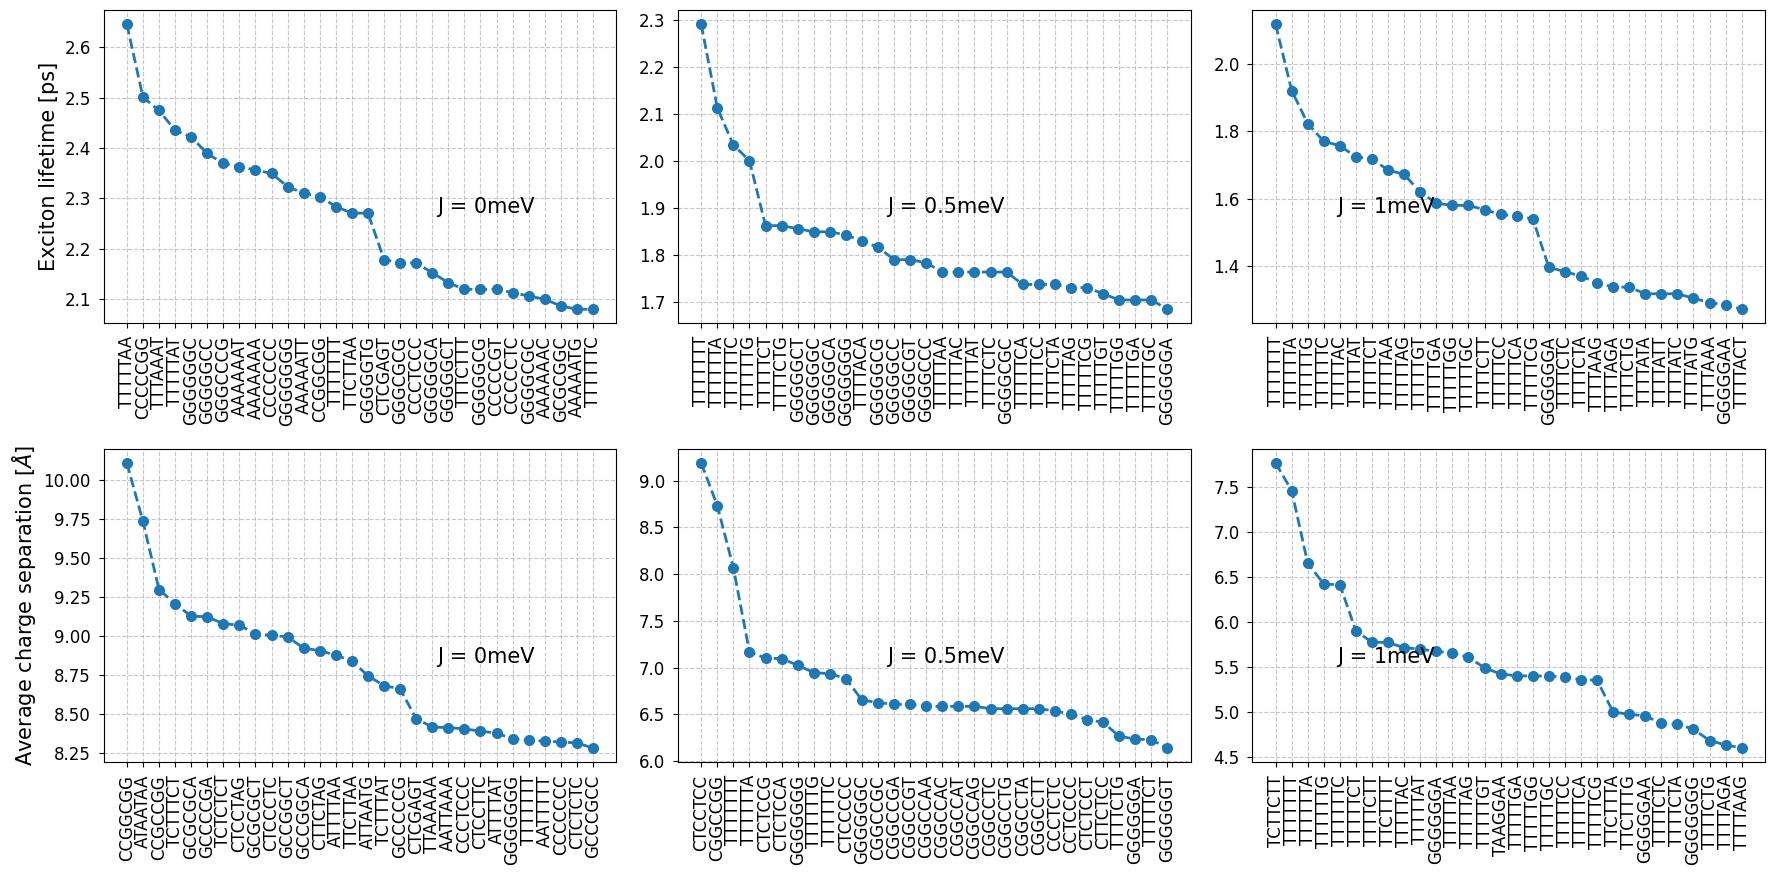

In [22]:
from qDNA import load_json, save_figure

def figS1(top_num = 30):

    fig, ax = plt.subplots(2, 3, figsize= (18,9) )
    
    for i, J in enumerate([0,0.5,1]):
        dipole_dict = load_json(f'dipole_7bp_J{J}', DATA_DIR)
        lifetime_dict = load_json(f'lifetime_7bp_J{J}', DATA_DIR) 
        dna_seqs_lifetime = list(lifetime_dict.keys())[:top_num]
        lifetimes = np.array(list(lifetime_dict.values()))[:top_num]/1000
        dna_seqs_dipole = list(dipole_dict.keys())[:top_num]
        dipoles = list(dipole_dict.values())[:top_num]
    
        ax[0,i].plot(dna_seqs_lifetime, lifetimes, 'o--')
        ax[0,i].set_xticks(dna_seqs_lifetime)
        ax[0,i].set_xticklabels(labels = dna_seqs_lifetime, rotation=90)
        ax[1,i].plot(dna_seqs_dipole, dipoles, 'o--')
        ax[1,i].set_xticks(dna_seqs_dipole)
        ax[1,i].set_xticklabels(labels = dna_seqs_dipole, rotation=90)
        fig.text(0.25*(i+1),0.75, f'J = {J}meV')
        fig.text(0.25*(i+1),0.25, f'J = {J}meV')
    
    ax[0,0].set_ylabel(r'Exciton lifetime [ps]')
    ax[1,0].set_ylabel(r'Average charge separation [$\AA$]')

    return fig

fig = figS1()
if save:
    save_figure(fig, 'Fig_S1', SAVE_DIR, extension='pdf')
plt.show()

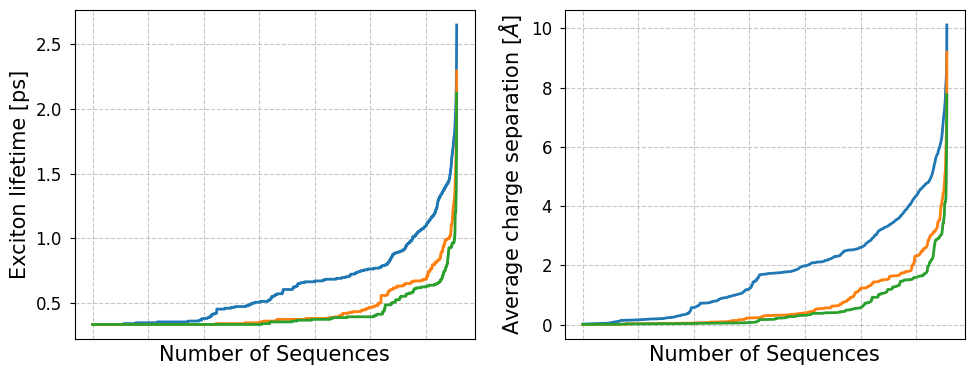

In [23]:
from qDNA import load_json, save_figure

def figS2():
    fig, ax = plt.subplots(1, 2, figsize= (10,4) )
    
    for J in [0,0.5,1]:
        dipole_dict = load_json(f'dipole_7bp_J{J}', DATA_DIR)
        lifetime_dict = load_json(f'lifetime_7bp_J{J}', DATA_DIR) 
        ax[0].plot( np.array( list(lifetime_dict.values())[::-1] )/1000 )
        ax[1].plot( list(dipole_dict.values())[::-1] )
    
    ax[0].set_ylabel(r'Exciton lifetime [ps]')
    ax[1].set_ylabel(r'Average charge separation [$\AA$]') 
    ax[0].set_xlabel("Number of Sequences")
    ax[1].set_xlabel("Number of Sequences")
    
    for axis in ax:
        axis.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

    return fig

fig = figS2()
if save:
    save_figure(fig, 'Fig_S2', SAVE_DIR, extension='pdf')
plt.show()

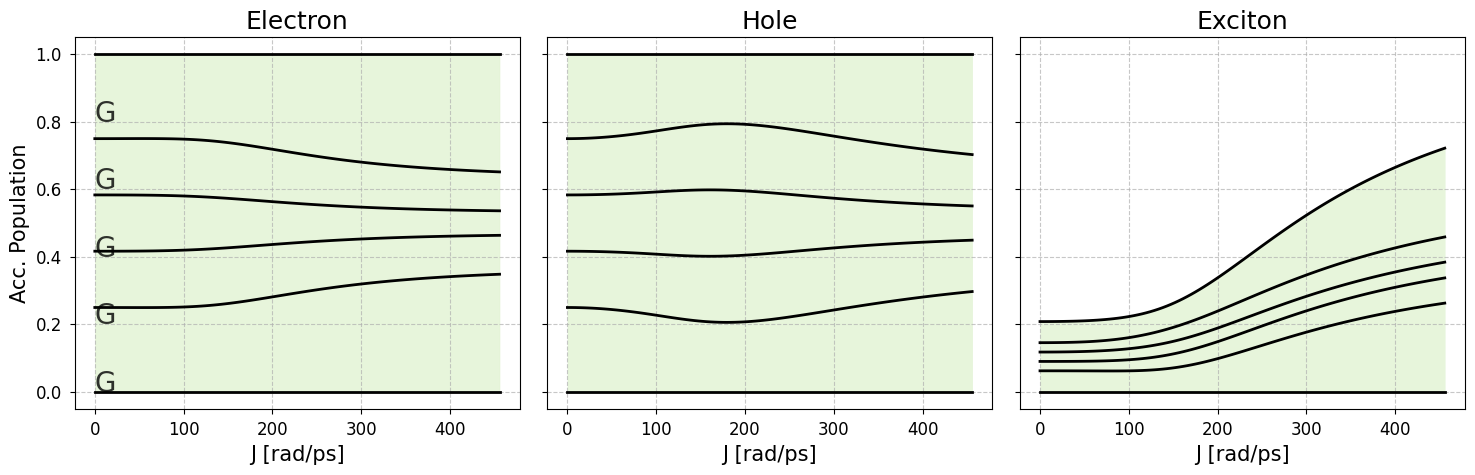

In [24]:
from qDNA import DNA_Seq, TB_Ham, plot_average_pop, save_figure

def figS3a(source = 'Simserides2014',
          upper_strand = 'GGGGG', 
          tb_model_name = 'WM',
          J_list = np.linspace(0, 300, 100), 
          J_unit = 'meV'):

    # data preparation   
    dna_seq = DNA_Seq(upper_strand, tb_model_name)
    tb_ham = TB_Ham(dna_seq, source=source)
    
    # plotting
    fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    plot_average_pop(ax, tb_ham, J_list, J_unit)
    return fig

fig = figS3a()
if save:
    save_figure(fig, 'Fig_S3a', SAVE_DIR, extension='pdf')
plt.show()

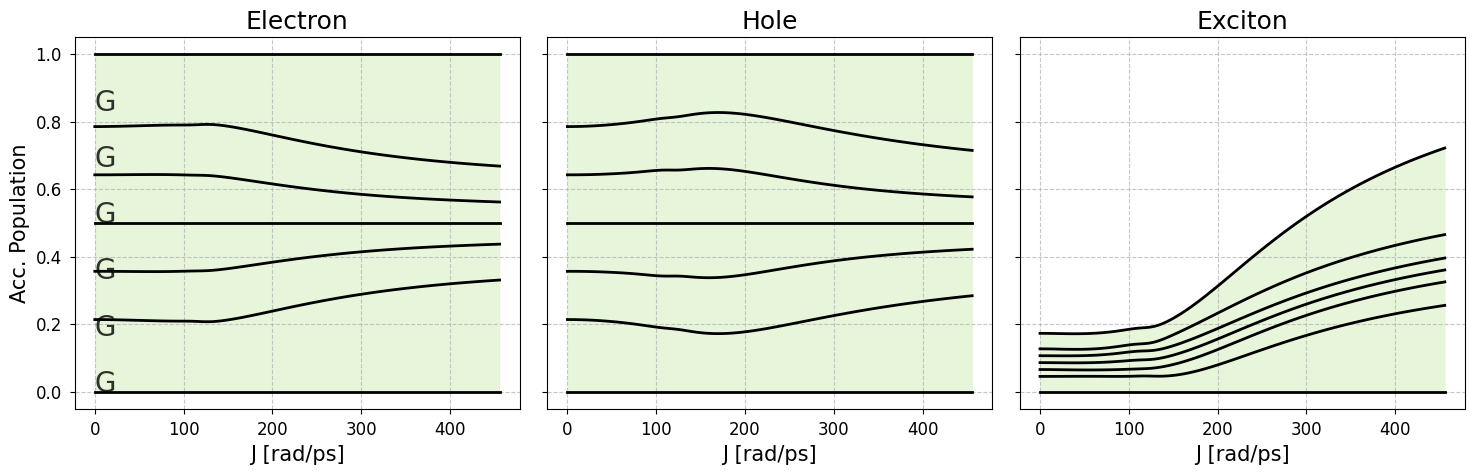

In [25]:
from qDNA import DNA_Seq, TB_Ham, plot_average_pop, save_figure

def figS3b(source = 'Simserides2014',
          upper_strand = 'GGGGGG', 
          tb_model_name = 'WM',
          J_list = np.linspace(0, 300, 100), 
          J_unit = 'meV'):

    # data preparation   
    dna_seq = DNA_Seq(upper_strand, tb_model_name)
    tb_ham = TB_Ham(dna_seq, source=source)
    
    # plotting
    fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    plot_average_pop(ax, tb_ham, J_list, J_unit)
    return fig

fig = figS3b()
if save:
    save_figure(fig, 'Fig_S3b', SAVE_DIR, extension='pdf')
plt.show()

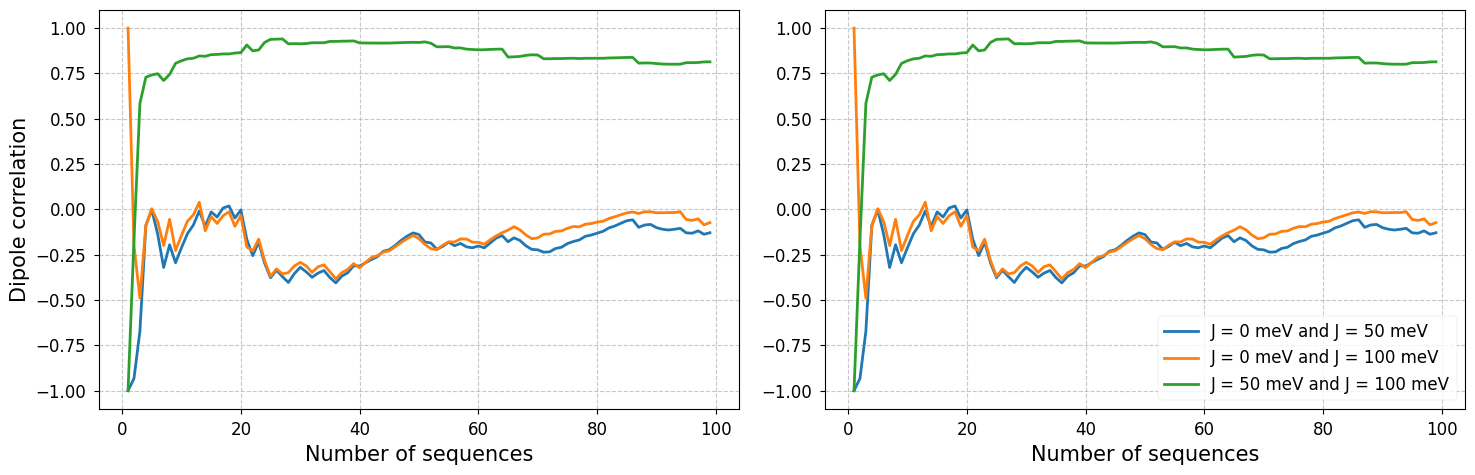

In [29]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

from qDNA import get_sorted_dict, save_figure

def figS4(num_sequences = 101):

    directory = DATA_DIR
    dominant_filename = 'dipole_7bp_J0'
    
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    for J1, J2 in [[0,0.5],[0,1],[0.5,1]]:
        filename1, filename2 = f'dipole_7bp_J{J1}', f'dipole_7bp_J{J2}'
        A = get_sorted_dict(dominant_filename, filename1, directory)
        B = get_sorted_dict(dominant_filename, filename2, directory)
        corr_list=[]
        for x in range(1,num_sequences):
            corr_list.append( np.corrcoef(list(B.values())[:x],list(A.values())[:x])[0, 1] )
        ax[0].plot(corr_list[:num_sequences])
        ax[1].plot(corr_list[:num_sequences])
    
    ax[1].legend([r'J = 0 meV and J = 50 meV','J = 0 meV and J = 100 meV','J = 50 meV and J = 100 meV'])
    ax[0].set_ylabel('Dipole correlation')
    ax[0].set_xlabel('Number of sequences')
    ax[1].set_xlabel('Number of sequences')

    return fig

fig = figS4()
if save:
    save_figure(fig, 'Fig_S4', SAVE_DIR, extension='pdf')
plt.show()

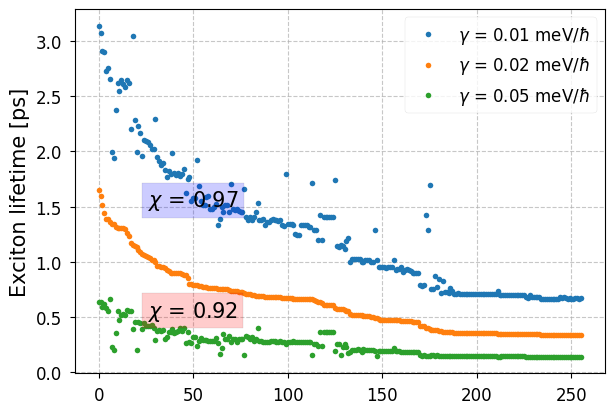

In [27]:
from qDNA import get_sorted_dict, get_correlation, save_figure

def figS5():
    directory = DATA_DIR
    dominant_filename = 'lifetime_4bp_relax0.02'
    
    fig, ax = plt.subplots()
    for relax_rate in [0.01, 0.02, 0.05]:
        filename = f'lifetime_4bp_relax{relax_rate}'
        lifetime_dict = get_sorted_dict(dominant_filename, filename, directory)
        ax.plot( np.array( list(lifetime_dict.values()) )/1000, '.', markersize=8, label=f'$\gamma$ = {relax_rate} meV/$\hbar$')
    
    ax.set_ylabel(r'Exciton lifetime [ps]')
    ax.legend()
    
    chi_1 = np.round( get_correlation(dominant_filename, 'lifetime_4bp_relax0.01', directory), 2)
    chi_2 = np.round( get_correlation(dominant_filename, 'lifetime_4bp_relax0.05', directory), 2)
    fig.text(0.25, 0.5, f'$\chi$ = {chi_1}', bbox=dict(facecolor='blue', alpha=0.2))
    fig.text(0.25, 0.25, f'$\chi$ = {chi_2}', bbox=dict(facecolor='red', alpha=0.2))

    return fig

fig = figS5()
if save:
    save_figure(fig, 'Fig_S5', SAVE_DIR, extension='pdf')
plt.show()